In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from multiprocessing import cpu_count
from multiprocessing import Pool

'<!DOCTYPE html><html lang="en"><head><meta name="next-head-count" content="2"/><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=5.0" /><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="robots" content="max-image-preview:large"/>   <meta charset="utf-8"><title>Stock Market Today | Bombay Stock Exchange Updates | Global Stock Market News  - Moneycontrol.com</title><meta name="description" content="Get stock market today live updates, bombay stock exchange, global and indian stock market news on a single platform anytime anywhere with ease ." /><meta name="news_keywords" content="Economic News, Economy News, Latest Economic News, Indian Economy News " /><meta name="Keywords" content="Economic News, Economy News, Latest Economic News, Indian Economy News "><meta content="NOODP" name="robots"><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta http-equiv="Last-Modified" content="Mon, 23 Dec 2024 14:23:12 PM"/><meta na
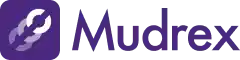
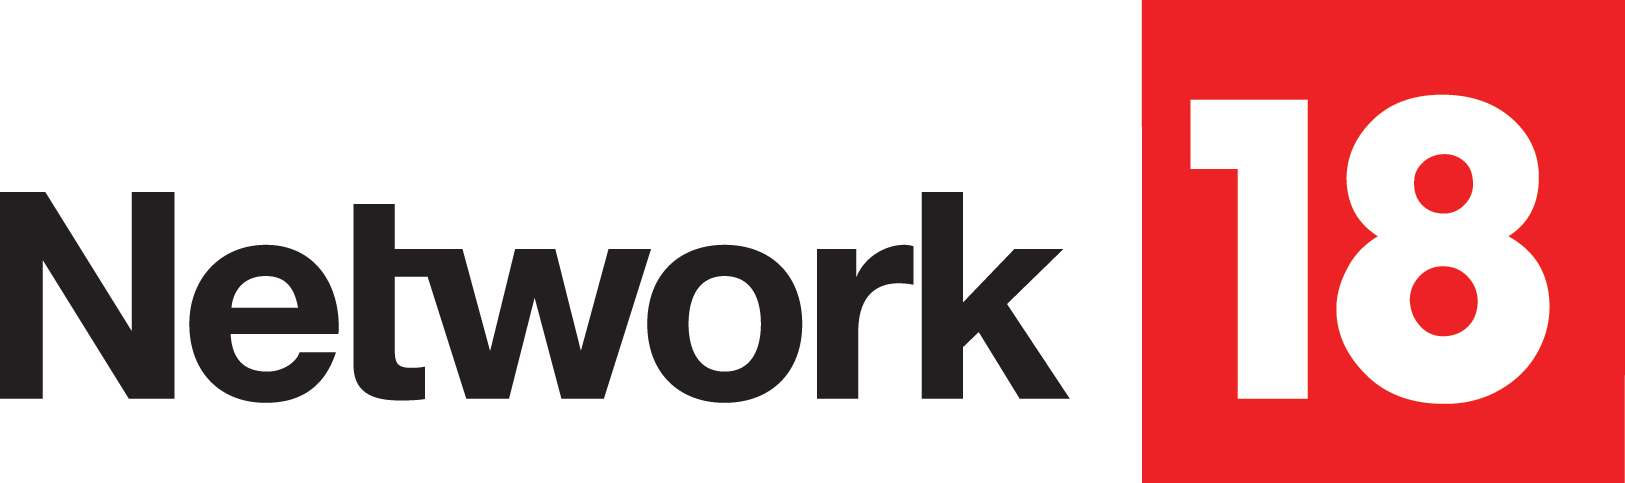

In [3]:
stock_page = requests.get('https://www.moneycontrol.com/news/business/stocks/')
stock_page.text

In [33]:
pages = []
soup = BeautifulSoup(stock_page.text, 'html5lib')
pages1_10 = soup.select('div.pagenation>a:not(:has(span))')
# print(pages1_10)
for page in pages1_10:
    page = page.get('href', 'No Link')
    pages.append(page)
mc_page2 = requests.get('https://www.moneycontrol.com/news/business/stocks/page-16/')
soup2 = BeautifulSoup(mc_page2.content, 'html5lib')
pages11_21 = soup2.select('div.pagenation>a:not(:has(span))')
for page in pages11_21:
    page = page.get('href', 'No Link')
    pages.append(page)
mc_page3 = requests.get('https://www.moneycontrol.com/news/business/stocks/page-27/')
soup3 = BeautifulSoup(mc_page3.content, 'html5lib')
pages22_end = soup3.select('div.pagenation>a:not(:has(span))')
for page in pages22_end:
    page = page.get('href', 'No Link')
    pages.append(page)
print(pages)


['https://www.moneycontrol.com/news/business/stocks/', 'https://www.moneycontrol.com/news/business/stocks/page-2/', 'https://www.moneycontrol.com/news/business/stocks/page-3/', 'https://www.moneycontrol.com/news/business/stocks/page-4/', 'https://www.moneycontrol.com/news/business/stocks/page-5/', 'https://www.moneycontrol.com/news/business/stocks/page-6/', 'https://www.moneycontrol.com/news/business/stocks/page-7/', 'https://www.moneycontrol.com/news/business/stocks/page-8/', 'https://www.moneycontrol.com/news/business/stocks/page-9/', 'https://www.moneycontrol.com/news/business/stocks/page-10/', 'https://www.moneycontrol.com/news/business/stocks/page-11/', 'https://www.moneycontrol.com/news/business/stocks/page-12/', 'https://www.moneycontrol.com/news/business/stocks/page-13/', 'https://www.moneycontrol.com/news/business/stocks/page-14/', 'https://www.moneycontrol.com/news/business/stocks/page-15/', 'https://www.moneycontrol.com/news/business/stocks/page-16/', 'https://www.moneycontr

In [34]:
description_pages = []
for page in pages:
    description_page = requests.get(page)
    soup_page = BeautifulSoup(description_page.content, 'html5lib')
    soup_page.prettify()
    page_titles_links = soup_page.select('h2>a')
    description_pages.extend(page_titles_links)
description_pages

[<a href="https://www.moneycontrol.com/news/business/markets/karnataka-moves-to-tax-mining-land-leases-proposals-may-hurt-nmdc-vedanta-jsw-steel-12896201.html" title="Karnataka moves to tax mining land, leases; proposals may hurt NMDC, Vedanta, JSW Steel">Karnataka moves to tax mining land, leases; proposals may hurt NMDC, Vedanta, JSW Steel</a>,
 <a href="https://www.moneycontrol.com/news/business/stocks/accumulate-avanti-feeds-target-of-rs-715-geojit-financial-services-12896228.html" title="Accumulate Avanti Feeds; target of Rs 715: Geojit Financial Services">Accumulate Avanti Feeds; target of Rs 715: Geojit Financial Services</a>,
 <a href="https://www.moneycontrol.com/news/business/markets/mid-day-mood-sensex-falls-over-450-pts-from-day-s-high-but-remains-in-green-realty-metal-stocks-gain-vix-falls-7-12895735.html" title="Mid-day Mood | Sensex falls over 450 pts from day's high, but remains in green; realty, metal stocks gain; VIX falls 7%">Mid-day Mood | Sensex falls over 450 pts 

In [37]:
def scrap(line):
    link = line.get('href', 'No Link')
    if link != 'No Link':
        description_page = requests.get(link)
        description = BeautifulSoup(description_page.text, 'html5lib')
        description_head = description.select('h1.article_title')
        if len(description_head) == 1:
            description_head = description.select('h1.article_title')[0].get_text(strip=True)
        description_abstract = description.select('h2.article_desc')
        if len(description_abstract) == 1:
            description_abstract = description.select('h2.article_desc')[0].get_text(strip=True)
        description_content = description.select('div#contentdata>p')
        content_str = ""
        for p in description_content:
            # print(p.get_text(strip=True))
            content_str += p.get_text(strip=True) + " "
        # content.append(content_str)
        return description_head, description_abstract, content_str

In [38]:
with Pool(cpu_count()) as p:
    results = p.map(scrap, description_pages)

In [40]:
results

[('Karnataka moves to tax mining land, leases; proposals may hurt NMDC, Vedanta, JSW Steel',
  'This proposed bill comes after a recent Supreme Court order had allowed state governments to impose taxes on minerals. Key miners NMDC, Vedanta and JSW Steel are likely to be impacted the most by the proposed provisions.',
  'The Karnataka Mineral Tax Bill 2024 has proposed to impose retrospective tax on mineral land and mineral rights, with retrospective tax staggered over 12 years, starting April 2026. This proposed bill comes after a recent Supreme Court order had allowed state governments to impose taxes on minerals. A nine-judge Constitution bench had on July 25 ruled thatstates have the power to impose tax and leviessuch as cess on land from which the mineral is extracted from, as well as the minerals. As per inputs from CNBC-TV18, a mineral land tax of Rs 100 per tonne on iron ore is being proposed effective January 2005, in line with the Supreme Court order. As part of the tax on min

In [41]:
df = pd.DataFrame(results, columns=['Title', 'Abstract', 'Content'])
df = df.replace('', np.nan)
df = df.dropna()
df.to_csv('/mnt/c/Users/ankku/Downloads/moneycontrol_stock.csv', index = False)